In [1]:
import sys
sys.path.insert(0, '../src')
from vrp_annealing.utility import *
from vrp_annealing.time_window_solver import FQSTW

# Initial Test

In [2]:
n = 5
m = 2
seed = 1543

In [3]:
instance, xc, yc, time_windows = generate_time_window_instance(5, seed)

In [4]:
print(instance)
print()
print(xc)
print()
print(yc)
print()
print(time_windows)

[[ 0.          4.27004888  3.03023376 26.01875627  6.82521534 10.89540557]
 [ 4.27004888  0.         11.34000725 50.87753159  1.37726708 28.08723873]
 [ 3.03023376 11.34000725  0.         16.15307858 17.73198146  4.76500506]
 [26.01875627 50.87753159 16.15307858  0.         58.76742563  3.44295045]
 [ 6.82521534  1.37726708 17.73198146 58.76742563  0.         34.83384593]
 [10.89540557 28.08723873  4.76500506  3.44295045 34.83384593  0.        ]]

[ 0.51003914  2.55963937 -0.64283509 -4.57068577  2.98724481 -2.72584275]

[ 1.05534574  0.79231007 -0.24892217  0.60258683  1.88520561  0.40382905]

[[None, None], [4, 69], [5, 100], [0, 93], [2, 75], [3, 58]]


In [5]:
fqs = FQSTW(n, m, instance, xc, yc, time_windows)

In [6]:
print(fqs.cost)

[[ 0.          4.27004888  3.03023376 26.01875627  6.82521534 10.89540557]
 [ 4.27004888  0.         11.34000725 50.87753159  1.37726708 28.08723873]
 [ 3.03023376 11.34000725  0.         16.15307858 17.73198146  4.76500506]
 [26.01875627 50.87753159 16.15307858  0.         58.76742563  3.44295045]
 [ 6.82521534  1.37726708 17.73198146 58.76742563  0.         34.83384593]
 [10.89540557 28.08723873  4.76500506  3.44295045 34.83384593  0.        ]]


In [7]:
print(fqs.tw)

[[None, None], [4, 69], [5, 100], [0, 93], [2, 75], [3, 58]]


In [8]:
fqs.solve()

In [13]:
print(fqs.sampleset)

   w.0.1 w.0.2 w.0.3 w.0.4 w.0.5 w.1.1 w.1.2 ... x.5.1.6 energy num_oc. ...
0    7.0   7.0   9.0   5.0   9.0   0.0   0.0 ...     0.0    0.0       1 ...
1    7.0   4.0   3.0   6.0   1.0   0.0   0.0 ...     0.0    0.0       1 ...
2    0.0   0.0   0.0   0.0   0.0  11.0  10.0 ...     0.0    0.0       1 ...
3    0.0   0.0   0.0   0.0   0.0  12.0   1.0 ...     0.0    0.0       1 ...
4    0.0   0.0   0.0   0.0   0.0  15.0   3.0 ...     0.0    0.0       1 ...
5    0.0   0.0   0.0   0.0   0.0  17.0   3.0 ...     0.0    0.0       1 ...
6    0.0   0.0   0.0   0.0   0.0  10.0   0.0 ...     0.0    0.0       1 ...
7    0.0   0.0   0.0   0.0   0.0   3.0   0.0 ...     0.0    0.0       1 ...
8    0.0   0.0   0.0   0.0   0.0  17.0   3.0 ...     0.0    0.0       1 ...
9    0.0   0.0   0.0   0.0   0.0   1.0   1.0 ...     0.0    0.0       1 ...
10   1.0   0.0   0.0   0.0   4.0   0.0   0.0 ...     0.0    0.0       1 ...
11   0.0   2.0   1.0   1.0   0.0   0.0   0.0 ...     0.0    0.0       1 ...
12   0.0   0

In [15]:
print(fqs.feasible_sampleset)

Empty SampleSet
Record Fields: ['sample', 'energy', 'num_occurrences', 'is_feasible', ...]
Variables: ['w.0.1', 'w.0.2', 'w.0.3', 'w.0.4', 'w.0.5', 'w.1.1', 'w.1.2', ...]
['INTEGER', 0 rows, 0 samples, 94 variables]


In [ ]:
routes = [[] for v in range(fqs.m)]
for v in range(fqs.m):
    for t in range(1, fqs.n + 2):
        for i in range(fqs.n+1):
            if fqs.sol.sample[f'x.{i}.{v}.{t}'] == 1:
                routes[v].append(i)

print(routes)

In [ ]:
fqs.visualize()

In [ ]:
fqs.model.check_feasible(fqs.sol.sample)

# Experiments

In [13]:
vrp_list = []
for m in range(2,5):
    for n in range(3,10):
        instance, xc, yc, time_windows = generate_time_window_instance(n)
        vrp = FQSTW(n, m, instance, xc, yc, time_windows)
        vrp.solve()
        vrp_list.append(vrp)

SolverFailureError: Problem not accepted because user avneeshverma03@gmail.com has insufficient remaining solver access time in project DEV

In [22]:
for vrp in vrp_list:
    print(vrp.timing["qpu_access_time"])

15213
15233
15219
15310
15306


AttributeError: 'NoneType' object has no attribute 'sample'

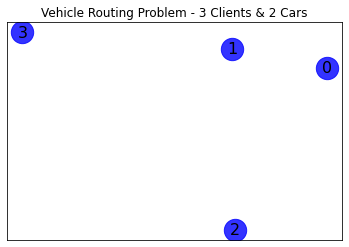

In [25]:
#for vrp in vrp_list:
#    vrp.visualize()
for i in range(5):
    vrp_list[i].visualize()

In [20]:
import matplotlib.pyplot as plt

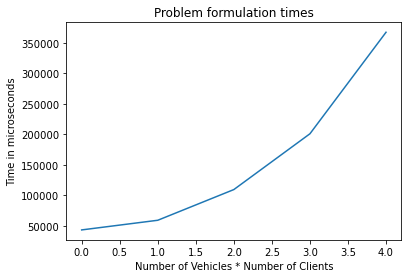

In [35]:
# Objective Function + Constraint Build Times
plt.figure()
x = []
#for m in range(5):
#    for n in range(15):
#        x.append(n*m)
x = [i for i in range(5)]
y = []
for vrp in vrp_list:
    y.append(vrp.timing["formulation_time"])
plt.title("Problem formulation times")
plt.xlabel("Number of Vehicles * Number of Clients")
plt.ylabel("Time in microseconds")
plt.plot(x,y)

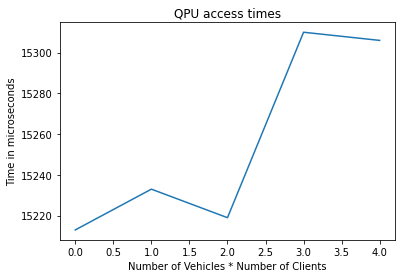

In [36]:
# Objective Function + Constraint Build Times
plt.figure()
x = []
#for m in range(5):
#    for n in range(15):
#        x.append(n*m)
x = [i for i in range(5)]
y = []
for vrp in vrp_list:
    y.append(vrp.timing["qpu_access_time"])
plt.title("QPU access times")
plt.xlabel("Number of Vehicles * Number of Clients")
plt.ylabel("Time in microseconds")
plt.plot(x,y)